In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
# Store filepaths in variables
file_clinicaltrial = "raw_data/clinicaltrial_data.csv"
file_mousedrug = "raw_data/mouse_drug_data.csv"

In [6]:
# Read our data files with the pandas library
clinicaltrial_df = pd.read_csv(file_clinicaltrial)
mousedrug_df = pd.read_csv(file_mousedrug)
clinicaltrial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
mousedrug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [8]:
# Merge data on Mouse ID
merged_df = pd.merge(clinicaltrial_df, mousedrug_df, on=('Mouse ID'))
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [9]:
# For tumor_vol_df extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)"
tumor_vol_df = merged_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [10]:
# Group tumor_vol_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Tumor Volume'
mean_sem_tv = tumor_vol_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
mean_sem_tv.head()

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [11]:
# Create lists of the tumor volume means for each of the four drugs being compared
cap_tvmean_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_tvmean_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ket_tvmean_list = mean_sem_tv.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
plc_tvmean_list = mean_sem_tv.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()

In [12]:
# Create lists of the tumor volume sems for each of the four drugs being compared
cap_tvsem_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
inf_tvsem_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ket_tvsem_list = mean_sem_tv.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
plc_tvsem_list = mean_sem_tv.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()

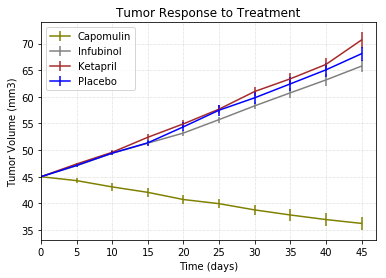

In [13]:
# Scatter plot showing how tumor volume changes over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_tvmean_list, yerr=cap_tvsem_list, fmt="olive",
                   label="Capomulin")
ax.errorbar(x_axis, inf_tvmean_list, yerr=inf_tvsem_list, fmt="gray",
                   label="Infubinol")
ax.errorbar(x_axis, ket_tvmean_list, yerr=ket_tvsem_list, fmt="brown",
                   label="Ketapril")
ax.errorbar(x_axis, plc_tvmean_list, yerr=plc_tvsem_list, fmt="blue",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        
# Show the resulting scatter plot
plt.show()

In [14]:

# For tumor_vol_df extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)"# For tu 
meta_sites_df = merged_df.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]
meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0


In [15]:
# Group meta_sites_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Metastatic Sites'
mean_sem_meta = meta_sites_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
mean_sem_meta.head()

Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [16]:
# Create lists of the metastatic sites means for each of the four drugs being compared
cap_mtmean_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
inf_mtmean_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
ket_mtmean_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
plc_mtmean_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

In [17]:
# Create lists of the metastatic sites sems for each of the four drugs being compared
cap_mtsem_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
inf_mtsem_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
ket_mtsem_list = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
plc_mtsem_list = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

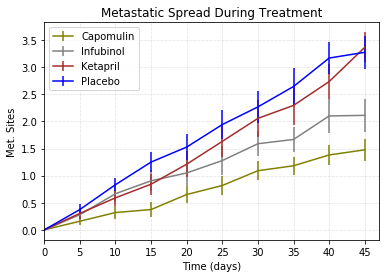

In [18]:
# Scatter plot showing metastatic spread over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_mtmean_list, yerr=cap_mtsem_list, fmt="olive",
                   label="Capomulin")
ax.errorbar(x_axis, inf_mtmean_list, yerr=inf_mtsem_list, fmt="gray",
                   label="Infubinol")
ax.errorbar(x_axis, ket_mtmean_list, yerr=ket_mtsem_list, fmt="brown",
                   label="Ketapril")
ax.errorbar(x_axis, plc_mtmean_list, yerr=plc_mtsem_list, fmt="blue",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        
# Show the resulting scatter plot
plt.show()

In [19]:
# Get the mouse survival rate over time grouped by 'Drug' and 'Timepoint
mouse_count = merged_df.groupby(['Drug', 'Timepoint'])['Timepoint'].count()
mouse_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Timepoint, dtype: int64

In [20]:
# Create lists of the mouse counts for each of the four drugs at the different timepoints
cap_surv_list = mouse_count.loc['Capomulin'].tolist()
inf_surv_list = mouse_count.loc['Infubinol'].tolist()
ket_surv_list = mouse_count.loc['Ketapril'].tolist()
plc_surv_list = mouse_count.loc['Placebo'].tolist()

In [21]:
# List comprehension to get the mouse survival rate
# Each value in the lists is divided by the first value of the respective list to get a percentage
cap_survrate = [(x/cap_surv_list[0])*100 for x in cap_surv_list]
inf_survrate = [(x/inf_surv_list[0])*100 for x in inf_surv_list]
ket_survrate = [(x/ket_surv_list[0])*100 for x in ket_surv_list]
plc_survrate = [(x/plc_surv_list[0])*100 for x in plc_surv_list]

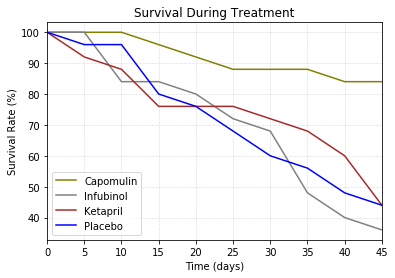

In [22]:
# Scatter plot showing mouse survival rate over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
ax.plot(x_axis, inf_survrate, color="gray", label="Infubinol")
ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, plc_survrate, color="blue", label="Placebo")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis))
        
# Show the resulting scatter plot
plt.show()

In [24]:

# compares the total % tumor volume change for each drug across the full 45 days.
cap_tv_change = int(((cap_tvmean_list[-1] - cap_tvmean_list[0])/cap_tvmean_list[0])*100)
inf_tv_change = int(((inf_tvmean_list[-1] - inf_tvmean_list[0])/inf_tvmean_list[0])*100)
ket_tv_change = int(((ket_tvmean_list[-1] - ket_tvmean_list[0])/ket_tvmean_list[0])*100)
plc_tv_change = int(((plc_tvmean_list[-1] - plc_tvmean_list[0])/plc_tvmean_list[0])*100)

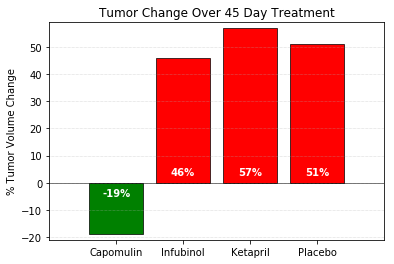

In [25]:
# Bar graph showing tumor growth % over time for each treatment

# y values using a list
y = [cap_tv_change, inf_tv_change, ket_tv_change, plc_tv_change]
# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(len(y))

# Set the colors of the bars depending on if pos or neg
# Neg % are green
# Pos % are red
colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')

# Set up the bar graph 
tumor_growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)

# Set the plot title and axes titles
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Set the limit of the x and y axes. lim(start, end)
plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)

# Plot horizontal line at y=0
plt.hlines(0, -1, len(x_axis), alpha=1.0, linewidth=0.5)

# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)

# Set up labels with the percentage change for each bar
def autolabel(rects):
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_growth_bar)

# Show the resulting scatter plot
plt.show()
